In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Folder
mission_path = "/home/matias/digiforest_mission_data/latest"

In [3]:
base_inverted = True

def read_twist_file(filename, base_inverted=False, normalize_ts=True):
  df = pd.read_csv(filename)

  # Generate timestamp from sec and nsec
  df["ts"] = df["sec"] + 1e-9*df["nsec"]
  
  # Normalize timestamp
  if normalize_ts:
    df["ts"] = df["ts"] - df["ts"].iloc[0]

  # Correct twist due to base inversion
  if base_inverted:
    df["vx"] *=-1
    df["vy"] *=-1
  
  # Speeds
  df["lin_speed"] = (df["vx"]**2 + df["vy"]**2).pow(1./2)
  df["ang_speed"] = df["wz"].abs()

  return df

df_state_twist = read_twist_file(os.path.join(mission_path, "states/state_twist_data.csv"), base_inverted=True)
df_operator_twist = read_twist_file(os.path.join(mission_path, "states/operator_twist_data.csv"), base_inverted=True)

### Matplotlib config

In [30]:
cm = 1/2.54
plot_width = 8.89*cm
plot_height = 4*cm

plt.rcParams['font.size'] = 8
# plt.rcParams['text.usetex'] = True

### Robot velocity

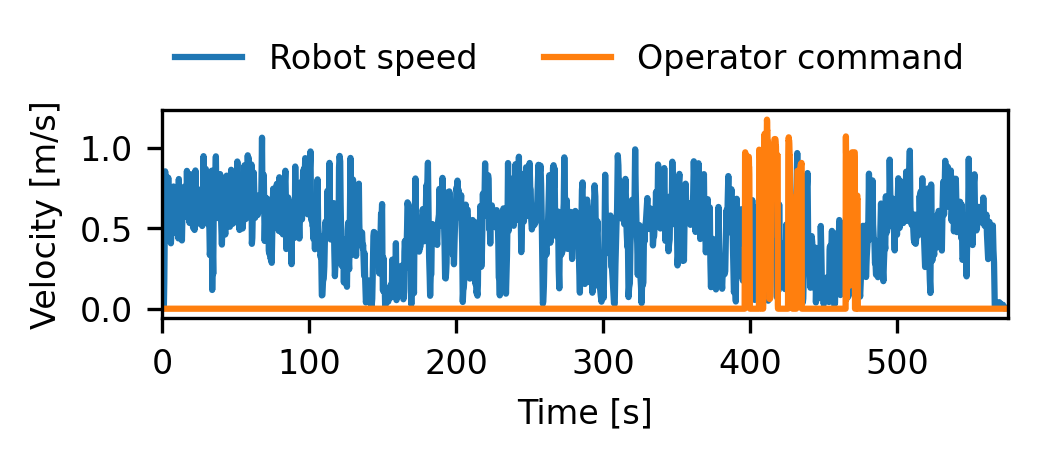

In [31]:
fig, ax = plt.subplots(1,1, figsize=(plot_width, plot_height), constrained_layout=False, dpi=300)

plt.plot(df_state_twist["ts"], df_state_twist["lin_speed"], label="Robot speed")
plt.plot(df_operator_twist["ts"], df_operator_twist["lin_speed"], label="Operator command")

ax.legend(edgecolor=(1, 1, 1, 0), framealpha=0.9, loc=(0, 1.1), ncol=2)
#ax.set_title('Computation Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.margins(x=0)

# Export
fig.set_tight_layout(True)
fig.savefig(os.path.join(mission_path, "mission_velocity.pdf"))

### Autonomy

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(plot_width, plot_height), constrained_layout=False, dpi=300)

plt.plot(df_state_twist["ts"], df_state_twist["lin_speed"], label="Robot speed")
plt.plot(df_operator_twist["ts"], df_operator_twist["lin_speed"], label="Operator command")

ax.legend(edgecolor=(1, 1, 1, 0), framealpha=0.9, loc=(0, 1.1), ncol=2)
#ax.set_title('Computation Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.margins(x=0)

# Export
fig.set_tight_layout(True)
fig.savefig(os.path.join(mission_path, "mission_velocity.pdf"))